# Installing Packages

In [1]:
%pip install numpy
%pip install tensorflow==2.10.0
%pip install tensorflow-gpu==2.10.0
%pip install matplotlib
%pip install scikit-image
%pip install scikit-learn
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Common imports
import numpy as np;
import random;
import joblib;

# import other code files
from setup import load_images_paths, load_images, unpack, convertPredArray;
from performance import printConfMtx, getAccuracy, getPrecision, getRecall, getF1, visualizeMisclassified;
from MLP import MLP;
from CNN import CNN;

# to make this notebook's output stable across runs
np.random.seed(42);

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt;
plt.rcParams['axes.labelsize'] = 14;
plt.rcParams['xtick.labelsize'] = 12;
plt.rcParams['ytick.labelsize'] = 12;

# import Global variables
import constants;

# Setup

## Load the Images

### Load the Paths of the Images

In [3]:
image_paths = load_images_paths();
YOR_TEST_SAMPLES = image_paths["YOR_TEST_SAMPLES"];
YOR_TEST_LABELS = image_paths["YOR_TEST_LABELS"];
YOR_TRAIN_SAMPLES = image_paths["YOR_TRAIN_SAMPLES"];
YOR_TRAIN_LABELS = image_paths["YOR_TRAIN_LABELS"];

CAL_TEST_SAMPLES = image_paths["CAL_TEST_SAMPLES"];
CAL_TEST_LABELS = image_paths["CAL_TEST_LABELS"];
CAL_TRAIN_SAMPLES = image_paths["CAL_TRAIN_SAMPLES"];
CAL_TRAIN_LABELS = image_paths["CAL_TRAIN_LABELS"];

print("In YOR dataset...")
print(f"Number of Samples in test set: {len(YOR_TEST_SAMPLES)}");
print(f"Number of Labels in test set: {len(YOR_TEST_LABELS)}");
print(f"Number of Samples in training set: {len(YOR_TRAIN_SAMPLES)}");
print(f"Number of Labels in training set: {len(YOR_TRAIN_LABELS)}");

print();

print("In CAL dataset...")
print(f"Number of Samples in test set: {len(CAL_TEST_SAMPLES)}");
print(f"Number of Labels in test set: {len(CAL_TEST_LABELS)}");
print(f"Number of Samples in training set: {len(CAL_TRAIN_SAMPLES)}");
print(f"Number of Labels in training set: {len(CAL_TRAIN_LABELS)}");

In YOR dataset...
Number of Samples in test set: 158
Number of Labels in test set: 158
Number of Samples in training set: 334
Number of Labels in training set: 334

In CAL dataset...
Number of Samples in test set: 237
Number of Labels in test set: 237
Number of Samples in training set: 253
Number of Labels in training set: 253


In [4]:
print("Inspecting the path in each set...");
print(YOR_TEST_SAMPLES[random.randint(0, len(YOR_TEST_SAMPLES)-1)]);
print(YOR_TRAIN_SAMPLES[random.randint(0, len(YOR_TRAIN_SAMPLES)-1)]);
print(CAL_TEST_SAMPLES[random.randint(0, len(CAL_TEST_SAMPLES)-1)]);
print(CAL_TRAIN_SAMPLES[random.randint(0, len(CAL_TRAIN_SAMPLES)-1)]);

Inspecting the path in each set...
.\stonefiles\yor\set0\Yor_20-specimen-i001-s124.jpg
.\stonefiles\yor\set1\Yor_110-specimen-i001-s125.jpg
.\stonefiles\cal\set0\Cal_32-specimen-i005-s125.jpg
.\stonefiles\cal\set2\Cal_84-specimen-i005-s125.jpg


### Load the actual images (from the obtained paths) into numpy arrays

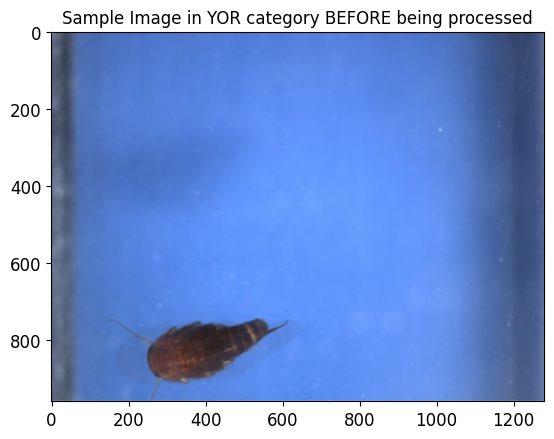

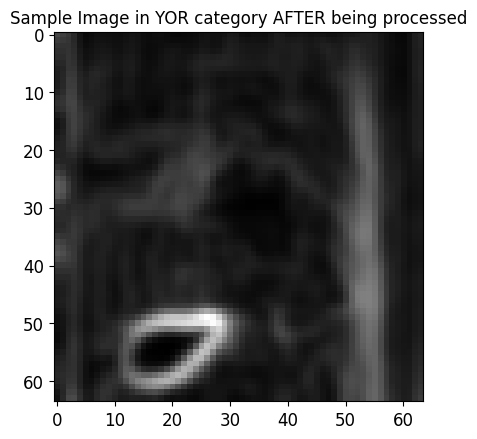

Type of the test samples structure: <class 'numpy.ndarray'>
Shape of the test samples array: (158, 64, 64)
Dimensionality of the test samples array: 3


In [5]:
YOR_TEST_SAMPLES = load_images(YOR_TEST_SAMPLES, constants.YOR.upper());
print(f"Type of the test samples structure: {type(YOR_TEST_SAMPLES)}");
print(f"Shape of the test samples array: {YOR_TEST_SAMPLES.shape}");
print(f"Dimensionality of the test samples array: {YOR_TEST_SAMPLES.ndim}");

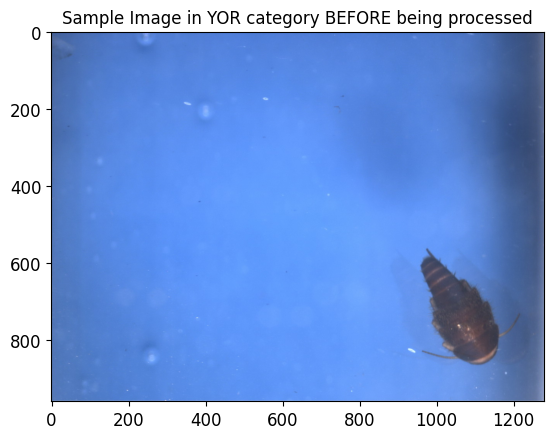

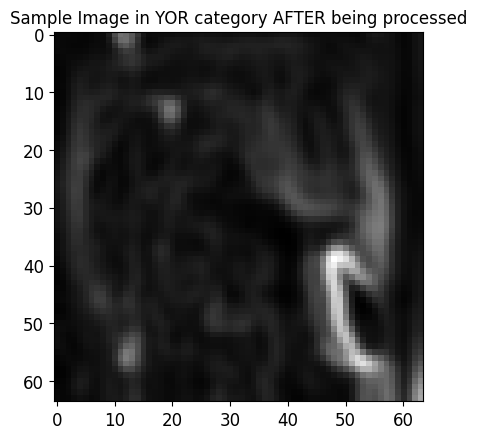

Type of the training samples structure: <class 'numpy.ndarray'>
Shape of the training samples array: (334, 64, 64)
Dimensionality of the training samples array: 3


In [6]:
YOR_TRAIN_SAMPLES = load_images(YOR_TRAIN_SAMPLES, constants.YOR.upper());
print(f"Type of the training samples structure: {type(YOR_TRAIN_SAMPLES)}");
print(f"Shape of the training samples array: {YOR_TRAIN_SAMPLES.shape}");
print(f"Dimensionality of the training samples array: {YOR_TRAIN_SAMPLES.ndim}");

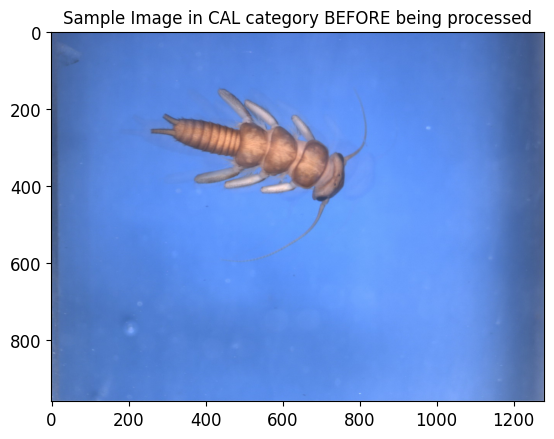

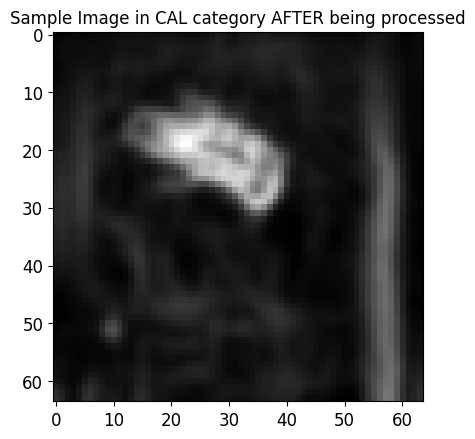

Type of the test samples structure: <class 'numpy.ndarray'>
Shape of the test samples array: (237, 64, 64)
Dimensionality of the test samples array: 3


In [7]:
CAL_TEST_SAMPLES = load_images(CAL_TEST_SAMPLES, constants.CAL.upper());
print(f"Type of the test samples structure: {type(CAL_TEST_SAMPLES)}");
print(f"Shape of the test samples array: {CAL_TEST_SAMPLES.shape}");
print(f"Dimensionality of the test samples array: {CAL_TEST_SAMPLES.ndim}");

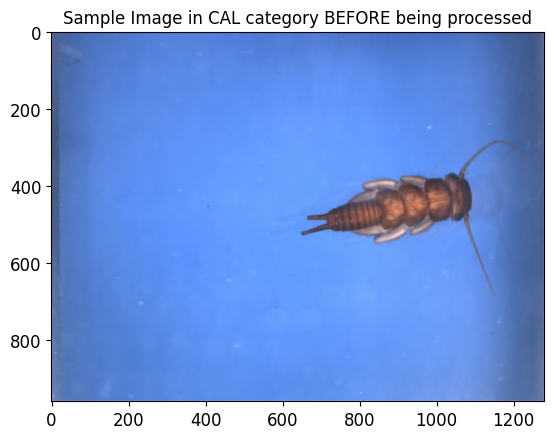

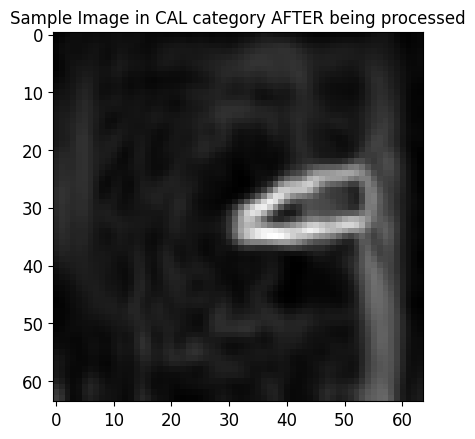

Type of the training samples structure: <class 'numpy.ndarray'>
Shape of the training samples array: (253, 64, 64)
Dimensionality of the training samples array: 3


In [8]:
CAL_TRAIN_SAMPLES = load_images(CAL_TRAIN_SAMPLES, constants.CAL.upper());
print(f"Type of the training samples structure: {type(CAL_TRAIN_SAMPLES)}");
print(f"Shape of the training samples array: {CAL_TRAIN_SAMPLES.shape}");
print(f"Dimensionality of the training samples array: {CAL_TRAIN_SAMPLES.ndim}");

#### Put those into the appropriate training set and testing set for modelling

In [9]:
X_train = np.concatenate((YOR_TRAIN_SAMPLES, CAL_TRAIN_SAMPLES));
y_train = np.concatenate((YOR_TRAIN_LABELS, CAL_TRAIN_LABELS));
X_test = np.concatenate((YOR_TEST_SAMPLES, CAL_TEST_SAMPLES));
y_test = np.concatenate((YOR_TEST_LABELS, CAL_TEST_LABELS));

In [10]:
print(f"Shape of Training Set SamplesArray: {X_train.shape}");
print(f"Dimentionality of Training Set Samples Array: {X_train.ndim}");
print();
print(f"Shape of Training Set Labels Array: {y_train.shape}");
print(f"Dimentionality of Training Set Labels Array: {y_train.ndim}");

print();

print(f"Shape of Test Set SamplesArray: {X_test.shape}");
print(f"Dimentionality of Test Set Samples Array: {X_test.ndim}");
print();
print(f"Shape of Test Set Labels Array: {y_test.shape}");
print(f"Dimentionality of Test Set Labels Array: {y_test.ndim}");

Shape of Training Set SamplesArray: (587, 64, 64)
Dimentionality of Training Set Samples Array: 3

Shape of Training Set Labels Array: (587,)
Dimentionality of Training Set Labels Array: 1

Shape of Test Set SamplesArray: (395, 64, 64)
Dimentionality of Test Set Samples Array: 3

Shape of Test Set Labels Array: (395,)
Dimentionality of Test Set Labels Array: 1


In [11]:
# Save Images to files (for easier debugging)
joblib.dump(X_train, "X_train.pkl");
joblib.dump(X_test, "X_test.pkl");
joblib.dump(y_train, "y_train.pkl");
joblib.dump(y_test, "y_test.pkl");

In [12]:
# Test if the .pkl files store the image samples correctly
# X_train
unpackContent = unpack("X_train.pkl");
if (len(np.unique(unpackContent == X_train)) == 1 and np.unique(unpackContent == X_train).__contains__(True)):
    print("X_train in file is correct.");

# X_test
unpackContent = unpack("X_test.pkl");
if (len(np.unique(unpackContent == X_test)) == 1 and np.unique(unpackContent == X_test).__contains__(True)):
    print("X_test in file is correct.");

# y_train
unpackContent = unpack("y_train.pkl");
if (len(np.unique(unpackContent == y_train)) == 1 and np.unique(unpackContent == y_train).__contains__(True)):
    print("y_train in file is correct.");

# y_test
unpackContent = unpack("y_test.pkl");
if (len(np.unique(unpackContent == y_test)) == 1 and np.unique(unpackContent == y_test).__contains__(True)):
    print("y_test in file is correct.");

X_train in file is correct.
X_test in file is correct.
y_train in file is correct.
y_test in file is correct.


In [13]:
X_train = unpack("X_train.pkl");
X_test = unpack("X_test.pkl");
y_train = unpack("y_train.pkl");
y_test = unpack("y_test.pkl");

# Multi-Layer Perceptron

In [14]:
# Load the Model
mlpModel = MLP();
mlpModel.model

INFO:tensorflow:Assets written to: ram://f17d7c8f-7b20-4dfb-819e-3a813ff73989/assets
INFO:tensorflow:Assets written to: ram://3a6f0874-3078-4766-a987-05f26f1d2c89/assets


In [15]:
# Normalize data
X_train, y_train, X_test, y_test = mlpModel.normalize(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

In [16]:
# summarize the model
mlpModel.model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                262208    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 262,273
Trainable params: 262,273
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train the Model
history = mlpModel.train(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
);
mlpModel.model

-----started training MLP model-----
INFO:tensorflow:Assets written to: ram://20c5fbb2-c36d-4b83-bfda-4c86c868e9e6/assets
13/13 [==============================] - 0s 2ms/step - loss: 0.6983 - acc: 0.4000
Test accuracy: 40.0%
-----The MLP model is completedly trained-----
Training Time Elapsed: 0:00:02.096241


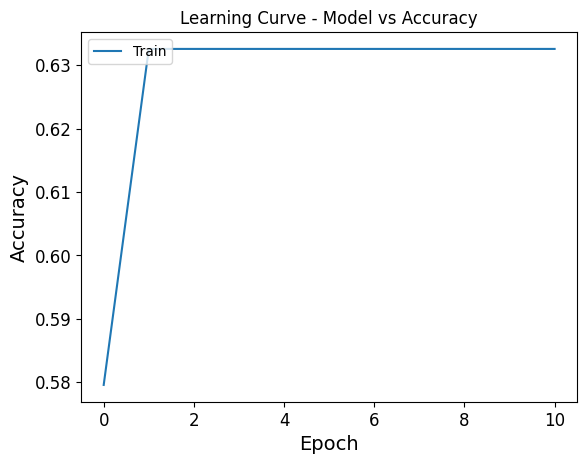

In [18]:
# Plot the Learning Curve
MLP.plotLearningCurve(history);

## Prediction based on Training Set

In [19]:
y_pred = mlpModel.predict(X_test=X_train);
print(f"Number of predictions made: {len(y_pred)}");
print(f"Shape of predictions array: {y_pred.shape}");
print(f"Dimentionality of predictions array: {y_pred.ndim}");

-----Started Predicting test samples-----
19/19 [==============================] - 0s 1ms/step
-----Prediction completed-----
Prediction Time Elapsed: 0:00:00.161907
Number of predictions made: 587
Shape of predictions array: (587, 1)
Dimentionality of predictions array: 2


Since the predictions array is in 2-dimension, we have to inspect an element in it and perform some conversions to the array. 

In [20]:
y_pred[random.randint(0, len(y_pred))]

array([0.5102707], dtype=float32)

We now understood that an element is basically a number (between 0 and 1) being wrapped in a list. Therefore, we now perform the conversion to `y_pred`.

In [21]:
y_pred = convertPredArray(y_pred);
# Convert predictions to class labels (0 or 1) based on a threshold of 0.5
y_pred = (y_pred > 0.5).astype(int);
print(f"Number of predictions made: {len(y_pred)}");
print(f"Shape of predictions array: {y_pred.shape}");
print(f"Dimentionality of predictions array: {y_pred.ndim}");
print(f"An element in the converted predictions array now: {y_pred[random.randint(0, len(y_pred))]}");

Number of predictions made: 587
Shape of predictions array: (587,)
Dimentionality of predictions array: 1
An element in the converted predictions array now: 1


In [22]:
# Recap
print(f"Number of actual samples in the test set: {len(X_train)}");
print(f"Number of actual labels in the test set: {len(y_train)}");
print(f"Shape of predictions array: {y_train.shape}");

Number of actual samples in the test set: 587
Number of actual labels in the test set: 587
Shape of predictions array: (587,)


We know that all samples have been successfully predicted from the training set. Now we display the confusion matrix regarding the prediction just made based on the Training Set.

In [23]:
printConfMtx(
    y_pred=y_pred,
    y_test=y_train
)

Predicted,Yor,Cal
Actual,,
Yor,334,0
Cal,253,0


In [24]:
# Evaluate Metrics
# first item is for the metric score in training set; second item is for that in training set
accuracies_mlp, precisions_mlp, recalls_mlp, f1s_mlp = [], [], [], []; 
accuracies_mlp.append(getAccuracy(
    y_pred=y_pred,
    y_test=y_train
));
precisions_mlp.append(getPrecision(
    y_pred=y_pred,
    y_test=y_train
));
recalls_mlp.append(getRecall(
    y_pred=y_pred,
    y_test=y_train
));
f1s_mlp.append(getF1(
    y_pred=y_pred,
    y_test=y_train
));
print(f"Accuracy of this MLP model based on Training Set: {accuracies_mlp[0]} ");
print(f"Precision of this MLP model based on Training Set: {precisions_mlp[0]} ");
print(f"Recall of this MLP model based on Training Set: {recalls_mlp[0]} ");
print(f"F1 Score of this MLP model based on Training Set: {f1s_mlp[0]} ");

Accuracy of this MLP model based on Training Set: 0.5689948892674617 
Precision of this MLP model based on Training Set: 0.5689948892674617 
Recall of this MLP model based on Training Set: 1.0 
F1 Score of this MLP model based on Training Set: 0.7252985884907709 


Visualizing a Misclassified Image In the Training Set

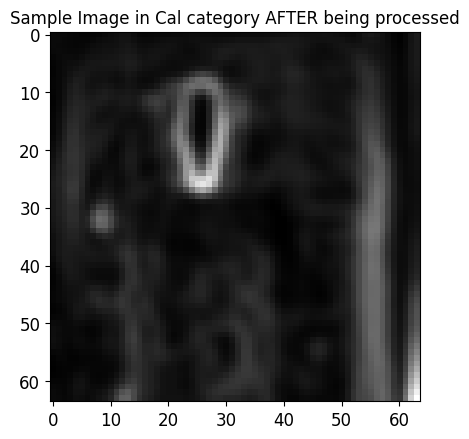

Number of misclassified images for this model: 253 out of total 587 images in the set.


In [25]:
visualizeMisclassified(
    X_test=X_train,
    y_test=y_train,
    y_pred=y_pred
);

## Prediction based on Test Set

In [26]:
y_pred = mlpModel.predict(X_test=X_test);
print(f"Number of predictions made: {len(y_pred)}");
print(f"Shape of predictions array: {y_pred.shape}");
print(f"Dimentionality of predictions array: {y_pred.ndim}");

-----Started Predicting test samples-----
13/13 [==============================] - 0s 1ms/step
-----Prediction completed-----
Prediction Time Elapsed: 0:00:00.079966
Number of predictions made: 395
Shape of predictions array: (395, 1)
Dimentionality of predictions array: 2


Since the predictions array is in 2-dimension, we have to inspect an element in it and perform some conversions to the array. 

In [27]:
y_pred[random.randint(0, len(y_pred))]

array([0.5115164], dtype=float32)

We now understood that an element is basically a number (between 0 and 1) being wrapped in a list. Therefore, we now perform the conversion to `y_pred`.

In [28]:
y_pred = convertPredArray(y_pred);
# Convert predictions to class labels (0 or 1) based on a threshold of 0.5
y_pred = (y_pred > 0.5).astype(int);
print(f"Number of predictions made: {len(y_pred)}");
print(f"Shape of predictions array: {y_pred.shape}");
print(f"Dimentionality of predictions array: {y_pred.ndim}");
print(f"An element in the converted predictions array now: {y_pred[random.randint(0, len(y_pred))]}");

Number of predictions made: 395
Shape of predictions array: (395,)
Dimentionality of predictions array: 1
An element in the converted predictions array now: 1


In [29]:
# Recap
print(f"Number of actual samples in the test set: {len(X_test)}");
print(f"Number of actual labels in the test set: {len(y_test)}");
print(f"Shape of predictions array: {y_test.shape}");

Number of actual samples in the test set: 395
Number of actual labels in the test set: 395
Shape of predictions array: (395,)


We know that all samples have been successfully predicted from the training set. Now we display the confusion matrix regarding the prediction just made based on the Test Set.

In [30]:
printConfMtx(
    y_pred=y_pred,
    y_test=y_test
)

Predicted,Yor,Cal
Actual,,
Yor,158,0
Cal,237,0


In [31]:
# Evaluate Metrics
# first item is for the metric score in training set; second item is for that in test set
accuracies_mlp.append(getAccuracy(
    y_pred=y_pred,
    y_test=y_test
));
precisions_mlp.append(getPrecision(
    y_pred=y_pred,
    y_test=y_test
));
recalls_mlp.append(getRecall(
    y_pred=y_pred,
    y_test=y_test
));
f1s_mlp.append(getF1(
    y_pred=y_pred,
    y_test=y_test
));
print(f"Accuracy of this MLP model based on Test Set: {accuracies_mlp[-1]} ");
print(f"Precision of this MLP model based on Test Set: {precisions_mlp[-1]} ");
print(f"Recall of this MLP model based on Test Set: {recalls_mlp[-1]} ");
print(f"F1 Score of this MLP model based on Test Set: {f1s_mlp[-1]} ");

Accuracy of this MLP model based on Test Set: 0.4 
Precision of this MLP model based on Test Set: 0.4 
Recall of this MLP model based on Test Set: 1.0 
F1 Score of this MLP model based on Test Set: 0.5714285714285714 


Visualizing a Misclassified Image in the Test Set

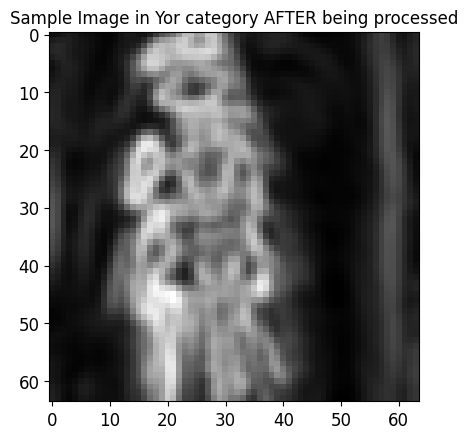

Number of misclassified images for this model: 237 out of total 395 images in the set.


In [32]:
visualizeMisclassified(
    X_test=X_test,
    y_test=y_test,
    y_pred=y_pred
);

# Convolutional Neural Network

In [33]:
# Build the model
cnnModel = CNN();
cnnModel.model;

INFO:tensorflow:Assets written to: ram://aef9d7ec-35a1-4c9d-afc2-1737683306ad/assets


INFO:tensorflow:Assets written to: ram://aef9d7ec-35a1-4c9d-afc2-1737683306ad/assets


INFO:tensorflow:Assets written to: ram://6d201fcd-6104-4260-95ef-29b5f40f6cbe/assets


INFO:tensorflow:Assets written to: ram://6d201fcd-6104-4260-95ef-29b5f40f6cbe/assets


In [34]:
# summarize the model
cnnModel.model.summary();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)        

Note: Since the data has already been normalized before training our first model (the MLP model), we need not to normalize again here. 

In [35]:
# Train the model
history = cnnModel.train(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
);

-----started training CNN model-----
Epoch 1/50
8/8 [==============================] - 3s 90ms/step - loss: 0.6995 - acc: 0.5554
Epoch 2/50
8/8 [==============================] - 0s 23ms/step - loss: 0.6862 - acc: 0.5690
Epoch 3/50
8/8 [==============================] - 0s 23ms/step - loss: 0.6850 - acc: 0.5690
Epoch 4/50
8/8 [==============================] - 0s 23ms/step - loss: 0.6843 - acc: 0.5690
Epoch 5/50
8/8 [==============================] - 0s 23ms/step - loss: 0.6853 - acc: 0.5690
Epoch 6/50
8/8 [==============================] - 0s 23ms/step - loss: 0.6877 - acc: 0.5690
Epoch 7/50
8/8 [==============================] - 0s 23ms/step - loss: 0.6853 - acc: 0.5690
Epoch 8/50
8/8 [==============================] - 0s 23ms/step - loss: 0.6840 - acc: 0.5690
Epoch 9/50
8/8 [==============================] - 0s 23ms/step - loss: 0.6837 - acc: 0.5690
Epoch 10/50
8/8 [==============================] - 0s 23ms/step - loss: 0.6856 - acc: 0.5690
Epoch 11/50
8/8 [=========================

INFO:tensorflow:Assets written to: ram://a049edab-31ad-423c-9b5d-a81018a51402/assets


INFO:tensorflow:Assets written to: ram://a049edab-31ad-423c-9b5d-a81018a51402/assets


13/13 [==============================] - 0s 12ms/step - loss: 0.3198 - acc: 0.8658
Test accuracy: 86.58%
-----The CNN model is completedly trained-----
Training Time Elapsed: 0:00:13.764889


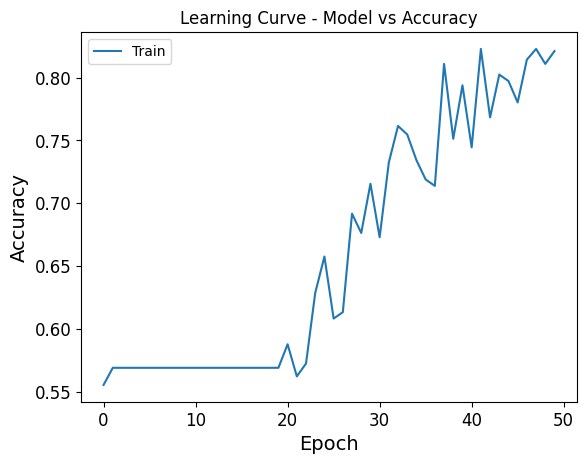

In [36]:
# Plot the Learning Curve
CNN.plotLearningCurve(history);



## Prediction based on Training Set

In [37]:
y_pred = cnnModel.predict(X_test=X_train);
print(f"Number of predictions made: {len(y_pred)}");
print(f"Shape of predictions array: {y_pred.shape}");
print(f"Dimentionality of predictions array: {y_pred.ndim}");

-----Started Predicting test samples-----
19/19 [==============================] - 0s 3ms/step
-----Prediction completed-----
Prediction Time Elapsed: 0:00:00.181662
Number of predictions made: 587
Shape of predictions array: (587, 1)
Dimentionality of predictions array: 2


Since the predictions array is in 2-dimension, we have to inspect an element in it and perform some conversions to the array. 

In [38]:
y_pred[random.randint(0, len(y_pred))]

array([0.33085027], dtype=float32)

We now understood that an element is basically a number (between 0 and 1) being wrapped in a list. Therefore, we now perform the conversion to `y_pred`.

In [39]:
y_pred = convertPredArray(y_pred);
# Convert predictions to class labels (0 or 1) based on a threshold of 0.5
y_pred = (y_pred > 0.5).astype(int);
print(f"Number of predictions made: {len(y_pred)}");
print(f"Shape of predictions array: {y_pred.shape}");
print(f"Dimentionality of predictions array: {y_pred.ndim}");
print(f"An element in the converted predictions array now: {y_pred[random.randint(0, len(y_pred))]}");

Number of predictions made: 587
Shape of predictions array: (587,)
Dimentionality of predictions array: 1
An element in the converted predictions array now: 1


In [40]:
# Recap
print(f"Number of actual samples in the test set: {len(X_train)}");
print(f"Number of actual labels in the test set: {len(y_train)}");
print(f"Shape of predictions array: {y_train.shape}");

Number of actual samples in the test set: 587
Number of actual labels in the test set: 587
Shape of predictions array: (587,)


We know that all samples have been successfully predicted from the training set. Now we display the confusion matrix regarding the prediction just made based on the Training Set.

In [41]:
printConfMtx(
    y_pred=y_pred,
    y_test=y_train
)

Predicted,Yor,Cal
Actual,,
Yor,265,69
Cal,41,212


In [42]:
# Evaluate Metrics
# first item is for the metric score in training set; second item is for that in training set
accuracies_cnn, precisions_cnn, recalls_cnn, f1s_cnn = [], [], [], []; 
accuracies_cnn.append(getAccuracy(
    y_pred=y_pred,
    y_test=y_train
));
precisions_cnn.append(getPrecision(
    y_pred=y_pred,
    y_test=y_train
));
recalls_cnn.append(getRecall(
    y_pred=y_pred,
    y_test=y_train
));
f1s_cnn.append(getF1(
    y_pred=y_pred,
    y_test=y_train
));
print(f"Accuracy of this MLP model based on Training Set: {accuracies_cnn[0]} ");
print(f"Precision of this MLP model based on Training Set: {precisions_cnn[0]} ");
print(f"Recall of this MLP model based on Training Set: {recalls_cnn[0]}");
print(f"F1 Score of this MLP model based on Training Set: {f1s_cnn[0]}");

Accuracy of this MLP model based on Training Set: 0.8126064735945485 
Precision of this MLP model based on Training Set: 0.8660130718954249 
Recall of this MLP model based on Training Set: 0.7934131736526946
F1 Score of this MLP model based on Training Set: 0.828125


Visualizing a Misclassified Image In the Training Set

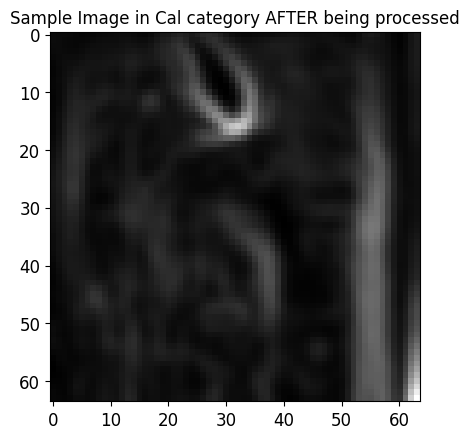

Number of misclassified images for this model: 110 out of total 587 images in the set.


In [43]:
visualizeMisclassified(
    X_test=X_train,
    y_test=y_train,
    y_pred=y_pred
);

## Prediction based on Test Set

In [44]:
y_pred = cnnModel.predict(X_test=X_test);
print(f"Number of predictions made: {len(y_pred)}");
print(f"Shape of predictions array: {y_pred.shape}");
print(f"Dimentionality of predictions array: {y_pred.ndim}");

-----Started Predicting test samples-----
13/13 [==============================] - 0s 3ms/step
-----Prediction completed-----
Prediction Time Elapsed: 0:00:00.134528
Number of predictions made: 395
Shape of predictions array: (395, 1)
Dimentionality of predictions array: 2


Since the predictions array is in 2-dimension, we have to inspect an element in it and perform some conversions to the array. 

In [45]:
y_pred[random.randint(0, len(y_pred))]

array([0.52530396], dtype=float32)

We now understood that an element is basically a number (between 0 and 1) being wrapped in a list. Therefore, we now perform the conversion to `y_pred`.

In [46]:
y_pred = convertPredArray(y_pred);
# Convert predictions to class labels (0 or 1) based on a threshold of 0.5
y_pred = (y_pred > 0.5).astype(int);
print(f"Number of predictions made: {len(y_pred)}");
print(f"Shape of predictions array: {y_pred.shape}");
print(f"Dimentionality of predictions array: {y_pred.ndim}");
print(f"An element in the converted predictions array now: {y_pred[random.randint(0, len(y_pred))]}");

Number of predictions made: 395
Shape of predictions array: (395,)
Dimentionality of predictions array: 1
An element in the converted predictions array now: 0


In [47]:
# Recap
print(f"Number of actual samples in the test set: {len(X_test)}");
print(f"Number of actual labels in the test set: {len(y_test)}");
print(f"Shape of predictions array: {y_test.shape}");

Number of actual samples in the test set: 395
Number of actual labels in the test set: 395
Shape of predictions array: (395,)


We know that all samples have been successfully predicted from the training set. Now we display the confusion matrix regarding the prediction just made based on the Test Set.

In [48]:
printConfMtx(
    y_pred=y_pred,
    y_test=y_test
)

Predicted,Yor,Cal
Actual,,
Yor,121,37
Cal,16,221


In [49]:
# Evaluate Metrics
# first item is for the metric score in training set; second item is for that in test set
accuracies_cnn.append(getAccuracy(
    y_pred=y_pred,
    y_test=y_test
));
precisions_cnn.append(getPrecision(
    y_pred=y_pred,
    y_test=y_test
));
recalls_cnn.append(getRecall(
    y_pred=y_pred,
    y_test=y_test
));
f1s_cnn.append(getF1(
    y_pred=y_pred,
    y_test=y_test
));
print(f"Accuracy of this MLP model based on Test Set: {accuracies_cnn[-1]} ");
print(f"Precision of this MLP model based on Test Set: {precisions_cnn[-1]} ");
print(f"Recall of this MLP model based on Test Set: {recalls_cnn[-1]} ");
print(f"F1 Score of this MLP model based on Test Set: {f1s_cnn[-1]} ");

Accuracy of this MLP model based on Test Set: 0.8658227848101265 
Precision of this MLP model based on Test Set: 0.8832116788321168 
Recall of this MLP model based on Test Set: 0.7658227848101266 
F1 Score of this MLP model based on Test Set: 0.8203389830508474 


Visualizing a Misclassified Image in the Test Set

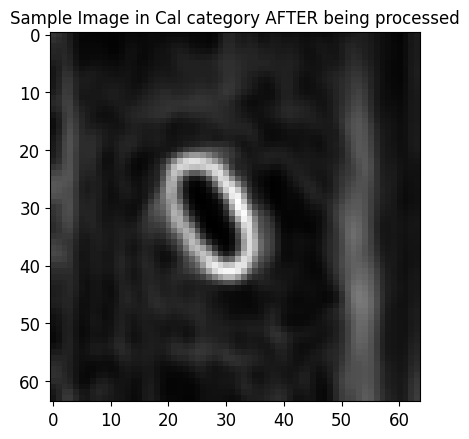

Number of misclassified images for this model: 53 out of total 395 images in the set.


In [50]:
visualizeMisclassified(
    X_test=X_test,
    y_test=y_test,
    y_pred=y_pred
);

# Analysis and Summary

Let's summarize the metrics from the MLP model.

In [51]:
print(f"Prediction Accuracy based on training set: {accuracies_mlp[0]}");
print(f"Prediction Precision based on training set: {precisions_mlp[0]}");
print(f"Prediction Recall based on training set: {recalls_mlp[0]}");
print(f"Prediction F1 score based on training set: {f1s_mlp[0]}");
print();
print(f"Prediction Accuracy based on test set: {accuracies_mlp[-1]}");
print(f"Prediction Precision based on test set: {precisions_mlp[-1]}");
print(f"Prediction Recall based on test set: {recalls_mlp[-1]}");
print(f"Prediction F1 score based on test set: {f1s_mlp[-1]}");
print();
mean_accuracy = np.mean(accuracies_mlp);
mean_precision = np.mean(precisions_mlp);
mean_recall = np.mean(recalls_mlp);
mean_f1 = np.mean(f1s_mlp);
print(f"And therefore, the mean accuracy of the MLP model across every set of data = {mean_accuracy}");
print(f"And therefore, the mean precision of the MLP model across every set of data = {mean_precision}");
print(f"And therefore, the mean recall of the MLP model across every set of data = {mean_recall}");
print(f"And therefore, the mean F1 score of the MLP model across every set of data = {mean_f1}");

Prediction Accuracy based on training set: 0.5689948892674617
Prediction Precision based on training set: 0.5689948892674617
Prediction Recall based on training set: 1.0
Prediction F1 score based on training set: 0.7252985884907709

Prediction Accuracy based on test set: 0.4
Prediction Precision based on test set: 0.4
Prediction Recall based on test set: 1.0
Prediction F1 score based on test set: 0.5714285714285714

And therefore, the mean accuracy of the MLP model across every set of data = 0.48449744463373084
And therefore, the mean precision of the MLP model across every set of data = 0.48449744463373084
And therefore, the mean recall of the MLP model across every set of data = 1.0
And therefore, the mean F1 score of the MLP model across every set of data = 0.6483635799596712


Since the scores in the training set are generally higher than those evaluated from the test set, there exists some overfitting issue, which means the training data generalizes the MLP model too good. But this isn't a huge difference, and therefore, overfitting issue is not too serious.

Let's also summarize the metrics from the CNN model.

In [52]:
print(f"Prediction Accuracy based on training set: {accuracies_cnn[0]}");
print(f"Prediction Precision based on training set: {precisions_cnn[0]}");
print(f"Prediction Recall based on training set: {recalls_cnn[0]}");
print(f"Prediction F1 score based on training set: {f1s_cnn[0]}");
print();
print(f"Prediction Accuracy based on test set: {accuracies_cnn[-1]}");
print(f"Prediction Precision based on test set: {precisions_cnn[-1]}");
print(f"Prediction Recall based on test set: {recalls_cnn[-1]}");
print(f"Prediction F1 score based on test set: {f1s_cnn[-1]}");
print();
mean_accuracy = np.mean(accuracies_cnn);
mean_precision = np.mean(precisions_cnn);
mean_recall = np.mean(recalls_cnn);
mean_f1 = np.mean(f1s_cnn);
print(f"And therefore, the mean accuracy of the CNN model across every set of data = {mean_accuracy}");
print(f"And therefore, the mean precision of the CNN model across every set of data = {mean_precision}");
print(f"And therefore, the mean recall of the CNN model across every set of data = {mean_recall}");
print(f"And therefore, the mean F1 score of the CNN model across every set of data = {mean_f1}");

Prediction Accuracy based on training set: 0.8126064735945485
Prediction Precision based on training set: 0.8660130718954249
Prediction Recall based on training set: 0.7934131736526946
Prediction F1 score based on training set: 0.828125

Prediction Accuracy based on test set: 0.8658227848101265
Prediction Precision based on test set: 0.8832116788321168
Prediction Recall based on test set: 0.7658227848101266
Prediction F1 score based on test set: 0.8203389830508474

And therefore, the mean accuracy of the CNN model across every set of data = 0.8392146292023375
And therefore, the mean precision of the CNN model across every set of data = 0.8746123753637709
And therefore, the mean recall of the CNN model across every set of data = 0.7796179792314106
And therefore, the mean F1 score of the CNN model across every set of data = 0.8242319915254237


Since the scores in the training set are very similar to those evaluated from the test set, there isn't any potential overfitting nor underfitting issues with the model to the given data.

Other Observations:
- Training Speed of the MLP model = 0:00:02.096241
- Training Speed of the CNN model = 0:00:13.764889
- Prediction Speed of the MLP model = 0:00:00.079966
- Prediction Speed of the CNN model = 0:00:00.134528
- Test Accuracy evaluated while training the MLP model = 40.0%
- Test Accuracy evaluated while training the CNN model = 86.58%
- Loss of MLP model = 0.6983
- Loss of CNN model = 0.3198

Comparison: 
- Except the mean recall, all other mean scores from the CNN model are higher than that from the MLP model.
- The CNN model took longer time to train. 
- The CNN model took longer time to make predictions.
- The CNN model seems to have higher test accuracy. 
- The CNN model seems to have lower loss rate. 

Conclusion:
- Therefore, despite more time taken to train the model or to make predictions, the CNN generally performs better than the MLP model.